## Disease Prediction from Symptoms

For this project, we'll be using the dataset from here: http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

Copy the data from all the columns and paste it into an excel sheet -> `raw_data.xlsx`

In [ ]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read Raw Dataset
df = pd.read_excel('/content/raw_data.xlsx')

In [ ]:
df.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [ ]:
# Fill all NaN with the values above
data = df.fillna(method='ffill')

<ipython-input-10-c3a2071c04ef>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df.fillna(method='ffill')


In [ ]:
data.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1  UMLS:C0020538_hypertensive disease                       3363.0   
2  UMLS:C0020538_hypertensive disease                       3363.0   
3  UMLS:C0020538_hypertensive disease                       3363.0   
4  UMLS:C0020538_hypertensive disease                       3363.0   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [ ]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_')
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [ ]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():

    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [ ]:
# See that the data is Processed Correctly
disease_symptom_dict

defaultdict(list,
            {'hypertensive disease': ['pain chest',
              'shortness of breath',
              'dizziness',
              'asthenia',
              'fall',
              'syncope',
              'vertigo',
              'sweat',
              'sweating increased',
              'palpitation',
              'nausea',
              'angina pectoris',
              'pressure chest'],
             'diabetes': ['polyuria',
              'polydypsia',
              'shortness of breath',
              'pain chest',
              'asthenia',
              'nausea',
              'orthopnea',
              'rale',
              'sweat',
              'sweating increased',
              'unresponsiveness',
              'mental status changes',
              'vertigo',
              'vomiting',
              'labored breathing'],
             'depression mental': ['feeling suicidal',
              'suicidal',
              'hallucinations auditory',
              'feel

In [ ]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

{'hypertensive disease': 3363.0,
 'diabetes': 1421.0,
 'depression mental': 1337.0,
 'depressive disorder': 1337.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 'pneumonia': 1029.0,
 'failure heart congestive': 963.0,
 'accident\xa0cerebrovascular': 885.0,
 'asthma': 835.0,
 'myocardial infarction': 759.0,
 'hypercholesterolemia': 685.0,
 'infection': 630.0,
 'infection urinary tract': 597.0,
 'anemia': 544.0,
 'chronic obstructive airway disease': 524.0,
 'dementia': 504.0,
 'insufficiency renal': 445.0,
 'confusion': 408.0,
 'degenerative\xa0polyarthritis': 405.0,
 'hypothyroidism': 398.0,
 'anxiety state': 390.0,
 'malignant neoplasms': 354.0,
 'primary malignant neoplasm': 354.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'HIV': 350.0,
 'hiv infections': 350.0,
 'cellulitis': 341.0,
 'gastroesophageal reflux disease': 325.0,
 'septicemia': 311.0,
 'systemic infection': 311.0,
 'sepsis (invertebrate)': 311.0,
 'deep vein thrombosis': 310.0,
 'deh

In [ ]:
# Save cleaned data as CSV
f = open('/content/cleaned_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [ ]:
# Read Cleaned Data as DF
df = pd.read_csv('/content/cleaned_data.csv')
df.columns = ['disease', 'symptom', 'occurence_count']
df.head()

disease              symptom  occurence_count
0  hypertensive disease  shortness of breath           3363.0
1  hypertensive disease            dizziness           3363.0
2  hypertensive disease             asthenia           3363.0
3  hypertensive disease                 fall           3363.0
4  hypertensive disease              syncope           3363.0

In [ ]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

 # ***EXPLORATORY DATA ANALYSIS***

***1) Distribution of Disease Occurrences***

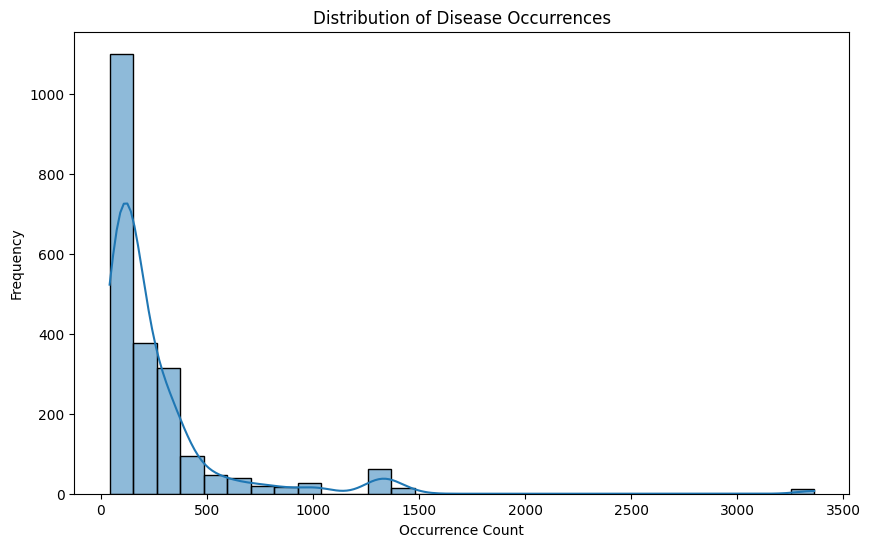

In [ ]:
# Distribution of Disease Occurrences
plt.figure(figsize=(10, 6))
sns.histplot(df['occurence_count'], kde=True, bins=30)
plt.title('Distribution of Disease Occurrences')
plt.xlabel('Occurrence Count')
plt.ylabel('Frequency')
plt.show()

***Top 10 most common diseases***


<ipython-input-20-e9e2fa2e7cc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_diseases.index, x=top_diseases.values, palette="viridis")


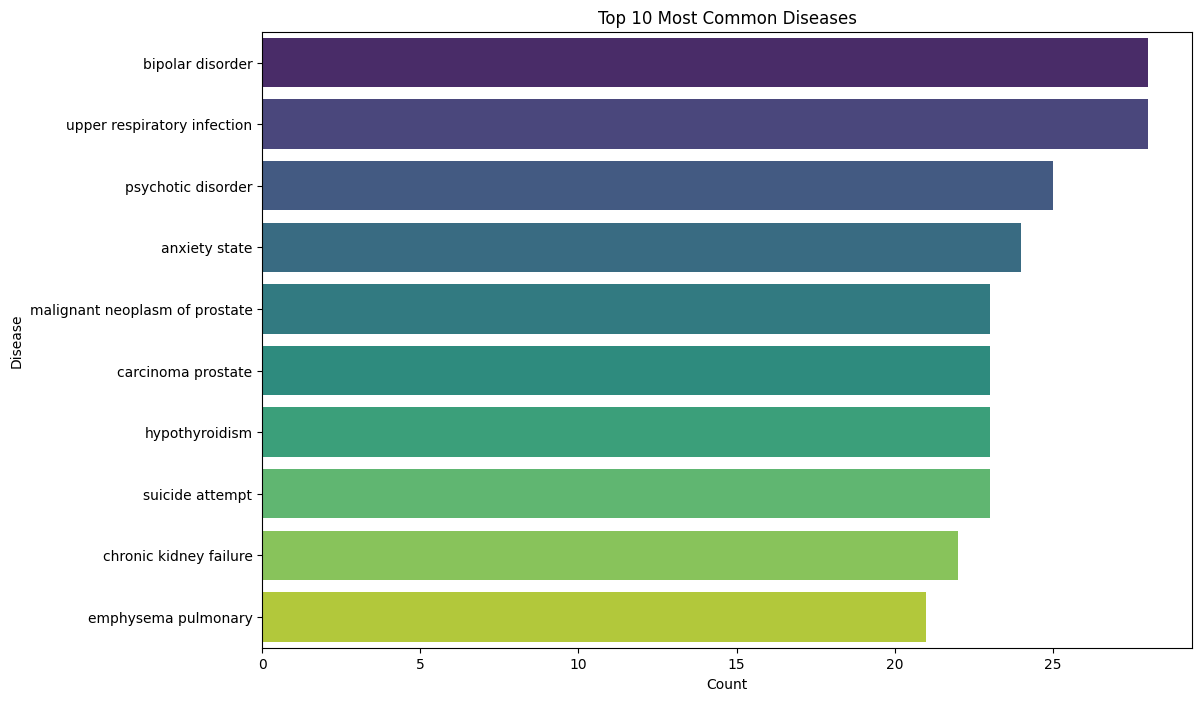

In [ ]:
top_diseases = df['disease'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_diseases.index, x=top_diseases.values, palette="viridis")
plt.title('Top 10 Most Common Diseases')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.show()

***Distribution of Symptoms***


<ipython-input-21-ad6485fe1a90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="symptom", data=df, order=df['symptom'].value_counts().iloc[:20].index, palette="coolwarm")


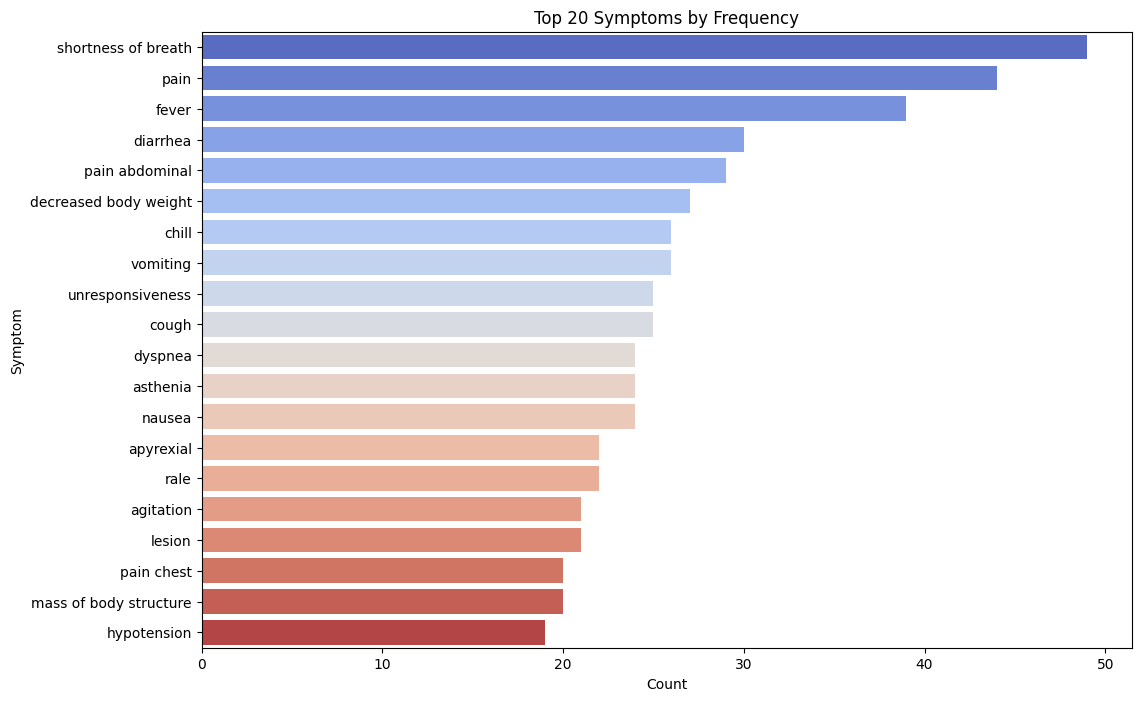

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y="symptom", data=df, order=df['symptom'].value_counts().iloc[:20].index, palette="coolwarm")
plt.title('Top 20 Symptoms by Frequency')
plt.xlabel('Count')
plt.ylabel('Symptom')
plt.show()

***Violin Plot for Occurrence Counts of Symptoms (Top Symptoms)***


<ipython-input-22-5b7d8e2aa1af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="occurence_count", y="symptom", data=symptom_data_top_symptoms, palette="muted", scale="width")
<ipython-input-22-5b7d8e2aa1af>:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="occurence_count", y="symptom", data=symptom_data_top_symptoms, palette="muted", scale="width")


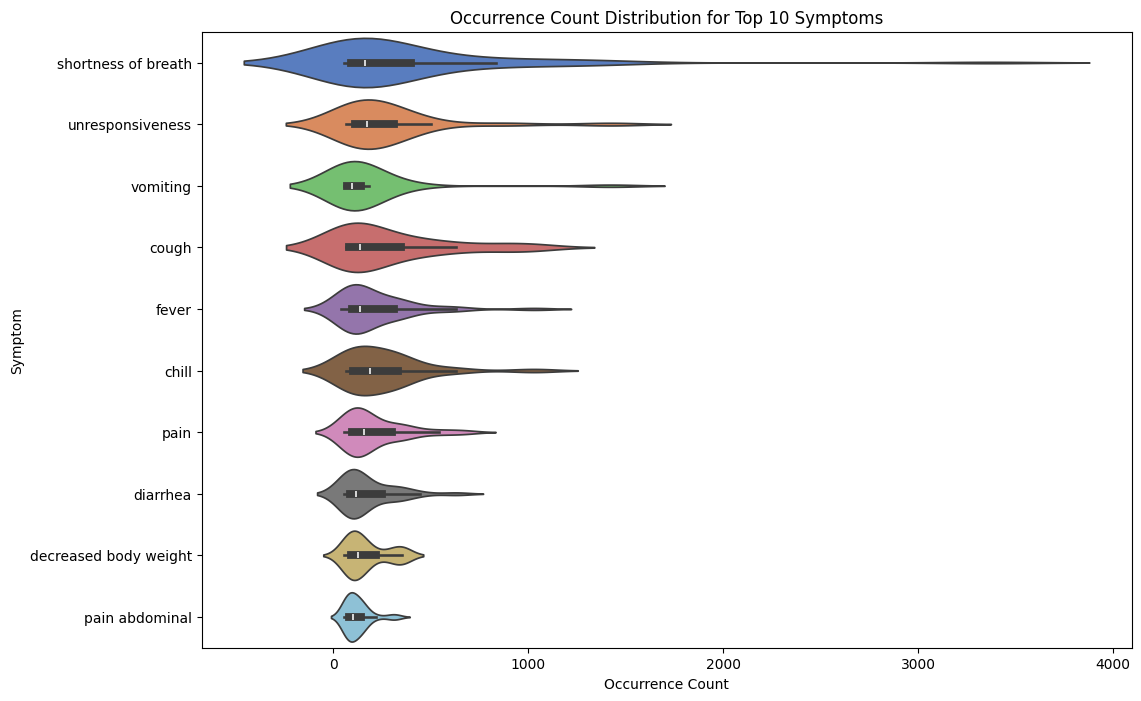

In [ ]:
top_symptoms = df['symptom'].value_counts().nlargest(10).index
symptom_data_top_symptoms = df[df['symptom'].isin(top_symptoms)]

plt.figure(figsize=(12, 8))
sns.violinplot(x="occurence_count", y="symptom", data=symptom_data_top_symptoms, palette="muted", scale="width")
plt.title('Occurrence Count Distribution for Top 10 Symptoms')
plt.xlabel('Occurrence Count')
plt.ylabel('Symptom')
plt.show()

***Disease Occurrence Count vs Symptom Count***



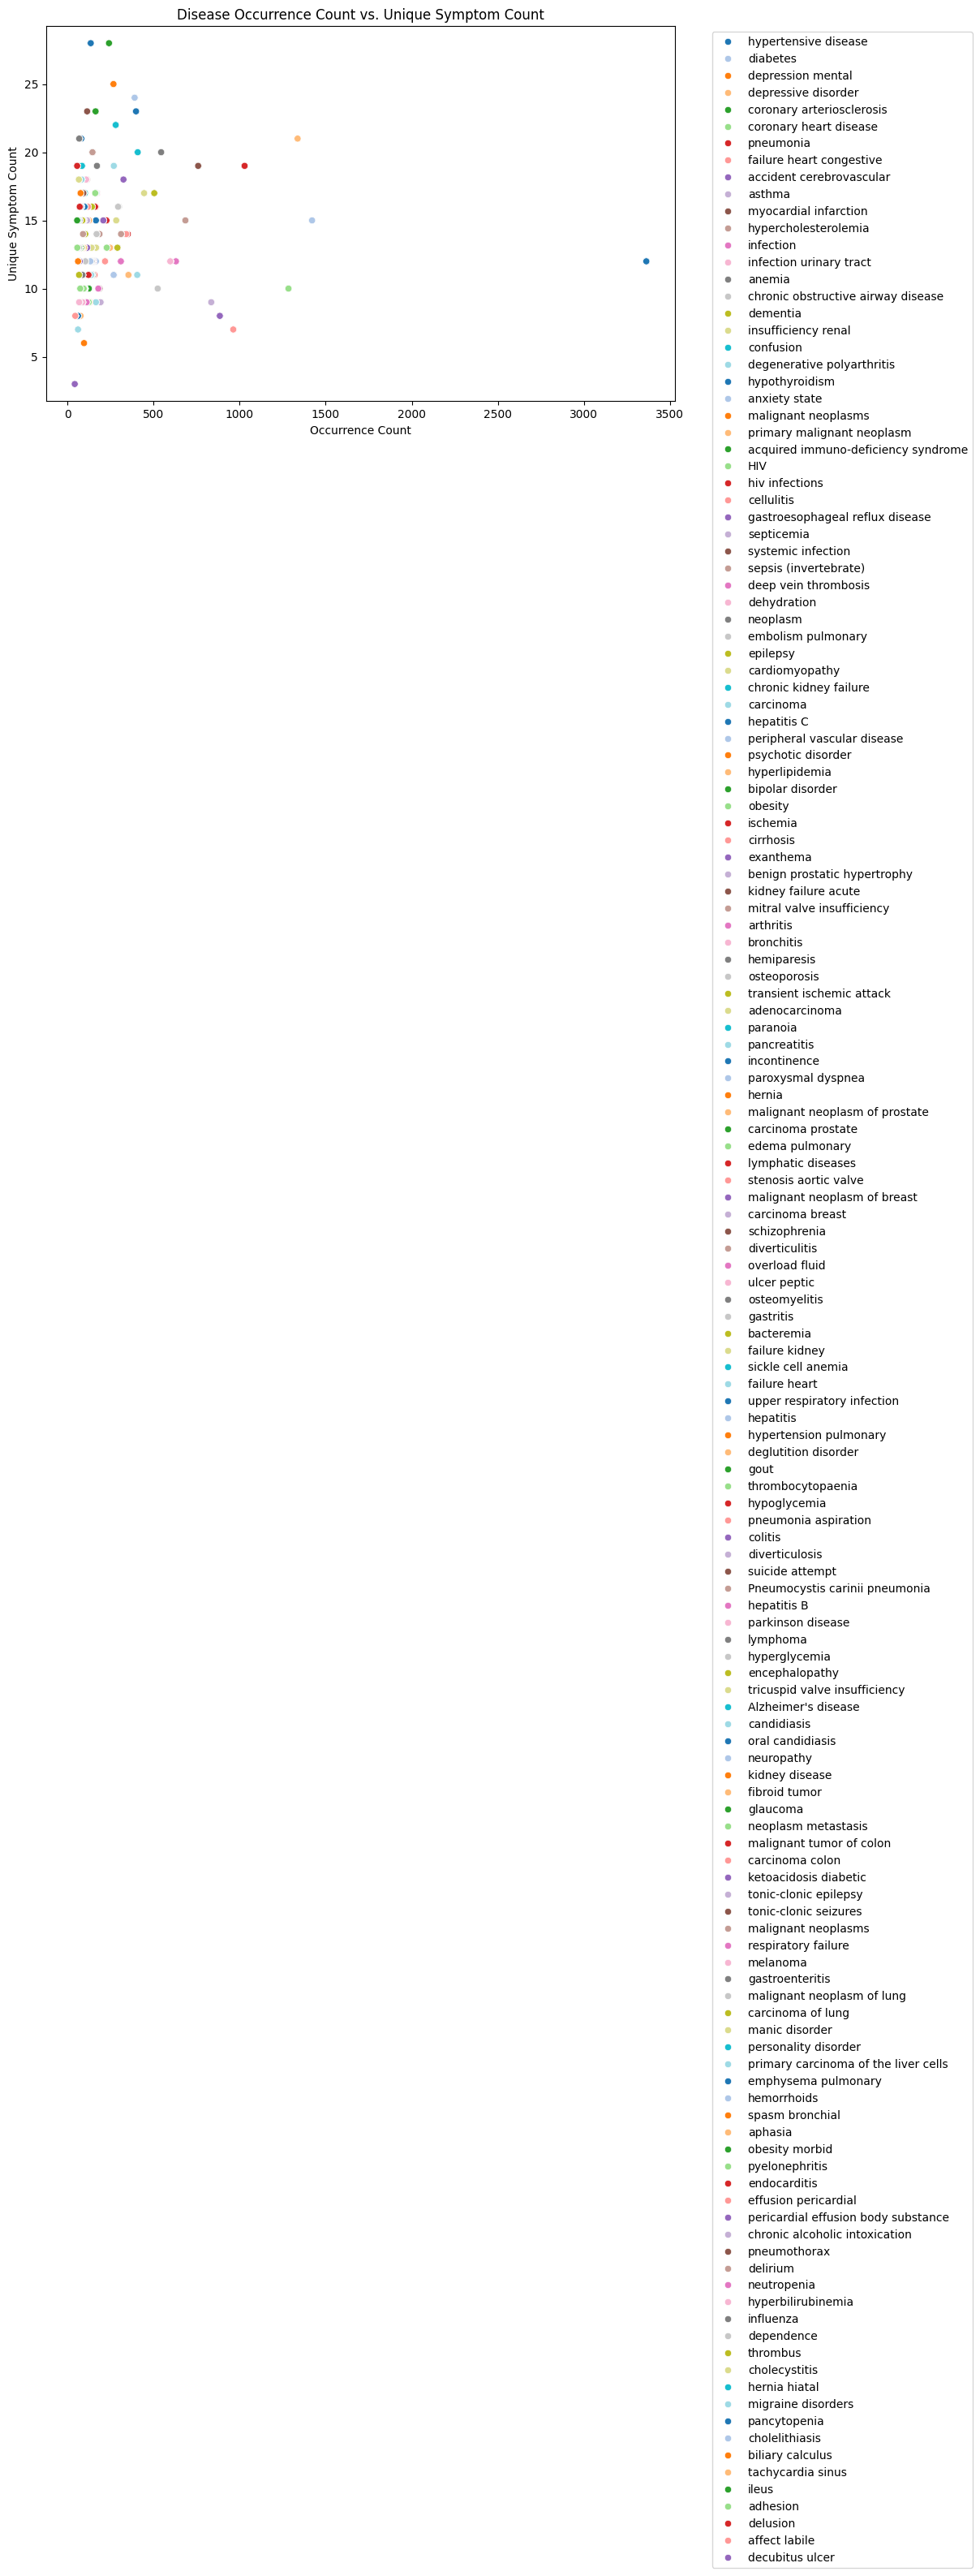

In [ ]:
symptom_count = df.groupby('disease')['symptom'].nunique().reset_index()
symptom_count.columns = ['disease', 'unique_symptom_count']
merged_data = pd.merge(df, symptom_count, on='disease')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="occurence_count", y="unique_symptom_count", hue="disease", palette="tab20")
plt.title('Disease Occurrence Count vs. Unique Symptom Count')
plt.xlabel('Occurrence Count')
plt.ylabel('Unique Symptom Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# DATA PREPROCESSING

In [ ]:
from sklearn import preprocessing

In [ ]:
n_unique = len(df['symptom'].unique())
n_unique

404

In [ ]:
df.dtypes

disease             object
symptom             object
occurence_count    float64
dtype: object

In [ ]:
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)

[328  87  28 ... 361 130 122]


In [ ]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
len(onehot_encoded[0])

404

In [ ]:
cols = np.asarray(df['symptom'].unique())
cols

array(['shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope',
       'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea',
       'angina pectoris', 'pressure chest', 'polyuria', 'polydypsia',
       'pain chest', 'orthopnea', 'rale', 'unresponsiveness',
       'mental status changes', 'vomiting', 'labored breathing',
       'feeling suicidal', 'suicidal', 'hallucinations auditory',
       'feeling hopeless', 'weepiness', 'sleeplessness',
       'motor retardation', 'irritable mood', 'blackout',
       'mood depressed', 'hallucinations visual', 'worry', 'agitation',
       'tremor', 'intoxication', 'verbal auditory hallucinations',
       'energy increased', 'difficulty', 'nightmare',
       'unable to concentrate', 'homelessness', 'hypokinesia',
       'dyspnea on exertion', 'chest tightness', 'cough', 'fever',
       'decreased translucency', 'productive cough', 'pleuritic pain',
       'yellow sputum', 'breath sounds decreased', 'chill', 'rhonchus',
       '

In [ ]:
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

Empty DataFrame
Columns: [shortness of breath, dizziness, asthenia, fall, syncope, vertigo, sweat, sweating increased, palpitation, nausea, angina pectoris, pressure chest, polyuria, polydypsia, pain chest, orthopnea, rale, unresponsiveness, mental status changes, vomiting, labored breathing, feeling suicidal, suicidal, hallucinations auditory, feeling hopeless, weepiness, sleeplessness, motor retardation, irritable mood, blackout, mood depressed, hallucinations visual, worry, agitation, tremor, intoxication, verbal auditory hallucinations, energy increased, difficulty, nightmare, unable to concentrate, homelessness, hypokinesia, dyspnea on exertion, chest tightness, cough, fever, decreased translucency, productive cough, pleuritic pain, yellow sputum, breath sounds decreased, chill, rhonchus, green sputum, non-productive cough, wheezing, haemoptysis, distress respiratory, tachypnea, malaise, night sweat, jugular venous distention, dyspnea, dysarthria, speech slurred, facial paresis, hemiplegia, seizure, numbness, symptom aggravating factors, st segment elevation, st segment depression, t wave inverted, presence of q wave, chest discomfort, bradycardia, pain, nonsmoker, erythema, hepatosplenomegaly, pruritus, diarrhea, abscess bacterial, swelling, apyrexial, dysuria, hematuria, renal angle tenderness, lethargy, hyponatremia, hemodynamically stable, difficulty passing urine, consciousness clear, guaiac positive, monoclonal, ecchymosis, tumor cell invasion, haemorrhage, pallor, ...]
Index: []

[0 rows x 404 columns]

In [ ]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [ ]:
df_ohe.head()

shortness of breath  dizziness  asthenia  fall  syncope  vertigo  sweat  \
0                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
1                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
2                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
3                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
4                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   

   sweating increased  palpitation  nausea  ...  feces in rectum  prodrome  \
0                 0.0          0.0     0.0  ...              0.0       0.0   
1                 0.0          0.0     0.0  ...              0.0       0.0   
2                 0.0          0.0     0.0  ...              0.0       0.0   
3                 0.0          0.0     0.0  ...              0.0       0.0   
4                 0.0          0.0     0.0  ...              0.0       0.0   

   hypoproteinemia  alcohol binge episode  abdomen acute  air fluid level  \
0              0.0                    0.0            0.0              0.0   
1              0.0                    0.0            0.0              0.0   
2              0.0                    0.0            0.0              0.0   
3              0.0                    0.0            0.0              0.0   
4              0.0                    0.0            0.0              0.0   

   catching breath  large-for-dates fetus  immobile  homicidal thoughts  
0              0.0                    0.0       0.0                 0.0  
1              0.0                    0.0       0.0                 0.0  
2              0.0                    0.0       0.0                 0.0  
3              0.0                    0.0       0.0                 0.0  
4              0.0                    0.0       0.0                 0.0  

[5 rows x 404 columns]

In [ ]:
len(df_ohe)

2126

In [ ]:

# Disease Dataframe
df_disease = df['disease']
df_disease.head()

0    hypertensive disease
1    hypertensive disease
2    hypertensive disease
3    hypertensive disease
4    hypertensive disease
Name: disease, dtype: object

In [ ]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

disease  shortness of breath  dizziness  asthenia  fall  \
0  hypertensive disease                  0.0        0.0       0.0   0.0   
1  hypertensive disease                  0.0        0.0       0.0   0.0   
2  hypertensive disease                  0.0        0.0       0.0   0.0   
3  hypertensive disease                  0.0        0.0       0.0   0.0   
4  hypertensive disease                  0.0        0.0       0.0   0.0   

   syncope  vertigo  sweat  sweating increased  palpitation  ...  \
0      0.0      0.0    0.0                 0.0          0.0  ...   
1      0.0      0.0    0.0                 0.0          0.0  ...   
2      0.0      0.0    0.0                 0.0          0.0  ...   
3      0.0      0.0    0.0                 0.0          0.0  ...   
4      0.0      0.0    0.0                 0.0          0.0  ...   

   feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0              0.0       0.0              0.0                    0.0   
1              0.0       0.0              0.0                    0.0   
2              0.0       0.0              0.0                    0.0   
3              0.0       0.0              0.0                    0.0   
4              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              0.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 0.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [ ]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_concat.head()

disease  shortness of breath  dizziness  asthenia  fall  \
0  hypertensive disease                  0.0        0.0       0.0   0.0   
1  hypertensive disease                  0.0        0.0       0.0   0.0   
2  hypertensive disease                  0.0        0.0       0.0   0.0   
3  hypertensive disease                  0.0        0.0       0.0   0.0   
4  hypertensive disease                  0.0        0.0       0.0   0.0   

   syncope  vertigo  sweat  sweating increased  palpitation  ...  \
0      0.0      0.0    0.0                 0.0          0.0  ...   
1      0.0      0.0    0.0                 0.0          0.0  ...   
2      0.0      0.0    0.0                 0.0          0.0  ...   
3      0.0      0.0    0.0                 0.0          0.0  ...   
4      0.0      0.0    0.0                 0.0          0.0  ...   

   feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0              0.0       0.0              0.0                    0.0   
1              0.0       0.0              0.0                    0.0   
2              0.0       0.0              0.0                    0.0   
3              0.0       0.0              0.0                    0.0   
4              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              0.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 0.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [ ]:
len(df_concat)

2097

In [ ]:
cols = df_concat.columns
cols

Index(['disease', 'shortness of breath', 'dizziness', 'asthenia', 'fall',
       'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation',
       ...
       'feces in rectum', 'prodrome', 'hypoproteinemia',
       'alcohol binge episode', 'abdomen acute', 'air fluid level',
       'catching breath', 'large-for-dates fetus', 'immobile',
       'homicidal thoughts'],
      dtype='object', length=405)

In [ ]:
cols = cols[1:]

In [ ]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

disease  shortness of breath  dizziness  \
0                  Alzheimer's disease                  0.0        0.0   
1                                  HIV                  0.0        0.0   
2       Pneumocystis carinii pneumonia                  0.0        0.0   
3             accident cerebrovascular                  0.0        0.0   
4  acquired immuno-deficiency syndrome                  0.0        0.0   

   asthenia  fall  syncope  vertigo  sweat  sweating increased  palpitation  \
0       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
1       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
2       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
3       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
4       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   

   ...  feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0  ...              0.0       0.0              0.0                    0.0   
1  ...              0.0       0.0              0.0                    0.0   
2  ...              0.0       0.0              0.0                    0.0   
3  ...              0.0       0.0              0.0                    0.0   
4  ...              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              1.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 1.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [ ]:
len(df_concat)

149

In [ ]:
df_concat.to_csv("/content/training_data.csv", index=False)

In [ ]:
# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['disease']

# MODEL TRAINING

1) Decision Tree clasifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
len(X_train), len(y_train)

(119, 119)

In [ ]:
len(X_test), len(y_test)

(30, 30)

In [ ]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X, y)

In [ ]:
clf_dt.score(X, y)

0.9731543624161074

2) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
clf_lr = lr.fit(X, y)


In [ ]:
clf_lr.score(X,y)

0.9731543624161074

3) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
clf_rf = rf.fit(X, y)


In [ ]:
clf_rf.score(X,y)

0.9261744966442953

4) SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
clf_svc = svc.fit(X, y)


In [ ]:
clf_svc.score(X,y)

0.9731543624161074

4) KNN



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights='distance')
clf_knn = knn.fit(X, y)


In [ ]:
clf_knn.score(X,y)

0.9731543624161074

In [ ]:
export_graphviz(dt,
                out_file='./tree.dot',
                feature_names=cols)

In [ ]:
from graphviz import Source
from sklearn import tree

graph = Source(export_graphviz(dt,
                out_file=None,
                feature_names=cols))

png_bytes = graph.pipe(format='png')

with open('tree.png','wb') as f:
    f.write(png_bytes)

In [ ]:
from IPython.display import Image
Image(png_bytes)

In [ ]:
disease_pred = clf_svc.predict(X)

In [ ]:
disease_real = y.values

In [ ]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: coronary heart disease
Actual: coronary arteriosclerosis

Pred: depressive disorder
Actual: depression mental

Pred: primary malignant neoplasm
Actual: malignant neoplasms

Pred: systemic infection
Actual: septicemia



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['disease']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize and train the models
dt = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights='distance')

models = [dt, lr, rf, svc, knn]
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVC', 'KNN']

# Evaluate each model on the test set
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy}')

Decision Tree: Accuracy = 0.0
Logistic Regression: Accuracy = 0.0
Random Forest: Accuracy = 0.0
SVC: Accuracy = 0.0
KNN: Accuracy = 0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed data
df_concat = pd.read_csv('/content/training_data.csv')

# Separate features (symptoms) and target (disease)
X = df_concat.drop('disease', axis=1)  # Features are symptoms
y = df_concat['disease']  # Target is disease

# One-hot encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=101)

# Initialize and train the models
dt = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights='distance')

models = [dt, lr, rf, svc, knn]
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVC', 'KNN']

# Evaluate each model on the test set
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy}')

Decision Tree: Accuracy = 0.0
Logistic Regression: Accuracy = 0.0
Random Forest: Accuracy = 0.0
SVC: Accuracy = 0.0
KNN: Accuracy = 0.0
